6.2 Exploring Relationships - This scrip contains the following:
1. Importing Visualization Libraries and Data
2. Data Cleaning
3. Exploring Relationships
 - Correlations
 - Scatterplots
 - Pair Plots
 - Categorical Plots

1. Importing Visualization Libraries and Data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#creating path to import the files
path = r'C:\Users\rbrand\Exploring Relationships'

In [4]:
#Importing real_estate.csv data set from original data.
re_org_data = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'real_estate.csv'), index_col=False)

In [5]:
#checking the head of the dataframe.
re_org_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


2. Data Cleaning

In [7]:
#checking the shape of the dataframe
re_org_data.shape

(414, 8)

In [9]:
re_org_data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [10]:
#Renaming the columns for clarity on the dataframe. To long or not clear to manage.
re_org_data.rename(columns = {'X1 transaction date' : 'Date', 'X2 house age': 'House age', 
                     'X3 distance to the nearest MRT station': 'D. metro', 'X4 number of convenience stores': 'N. shops',
                     'Y house price of unit area': 'Price per unit', 'X5 latitude' : 'Latitude', 'X6 longitude' : 'Longitude' },
                      inplace = True)

In [12]:
#Checking changes:
re_org_data.dtypes

No                  int64
Date              float64
House age         float64
D. metro          float64
N. shops            int64
Latitude          float64
Longitude         float64
Price per unit    float64
dtype: object

In [13]:
re_org_data.head()

,No,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [15]:
#Checking for missing value and duplicates:
re_org_data.isnull().sum()

No                0
Date              0
House age         0
D. metro          0
N. shops          0
Latitude          0
Longitude         0
Price per unit    0
dtype: int64

In [17]:
duplicate_rows = re_org_data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


No missing values or duplicates on the dataframe.

3. Explorting Relationships: 

Correlations:

In [21]:
#Creating correlation matrix
re_org_data.corr()

,No,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
Date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
House age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
D. metro,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
N. shops,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Price per unit,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


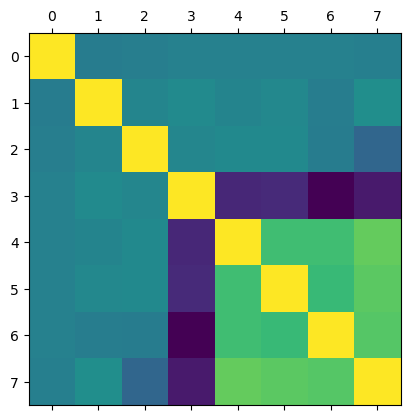

In [22]:
#Creating a correlation heatmap using matplotlib
plt.matshow(re_org_data.corr())
plt.show()

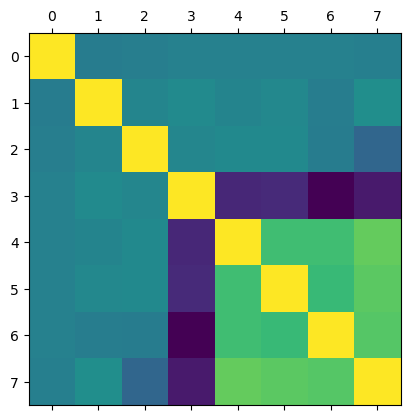

In [27]:
# Saving the corr visualization
plt.matshow(re_org_data.corr())
plt.savefig("out.png") 

Text(0.5, 1.0, 'Correlation Matrix')

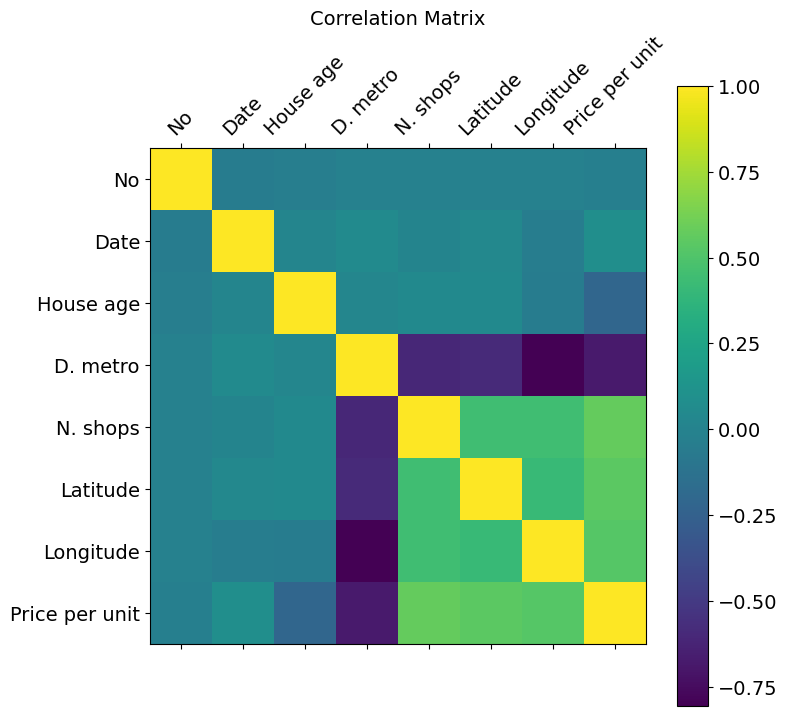

In [30]:
#Adding some labels, legend, and change the size of the heatmap visualization for clarity on the analysis.

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(re_org_data.corr(), fignum=f.number) # type of plot
plt.xticks(range(re_org_data.shape[1]), re_org_data.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(re_org_data.shape[1]), re_org_data.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

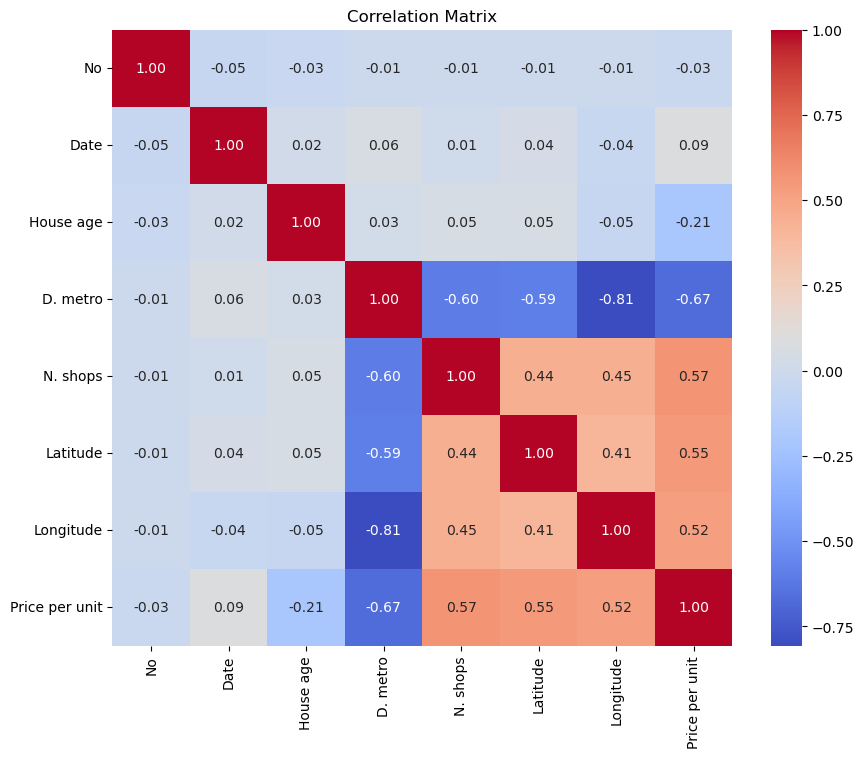

In [26]:
#creating a second correlation matrix heatmap using seaborn:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

# Saving the figure
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'correlation_heatmap.png'))
plt.show()

With the last correlation heatmap we can visualizes the strength and direction of relationships between variables in a dataset. Darker colors indicate stronger correlations, with red representing positive correlations and blue representing negative correlations. The diagonal line shows the correlation of each variable with itself (always 1). We can use the heatmap to quickly identify patterns and relationships between variables, guiding further analysis and modeling decisions.

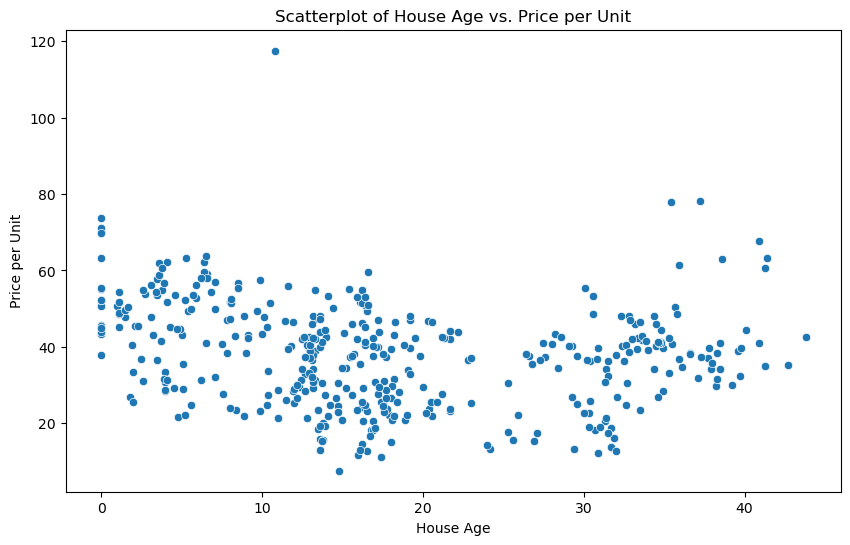

In [34]:
# Creating a scatterplot for the "house age" and "price per unit" columns in seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='House age', y='Price per unit', data=re_org_data)
plt.title('Scatterplot of House Age vs. Price per Unit')
plt.xlabel('House Age')
plt.ylabel('Price per Unit')

# Saving the figure
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'house_age_vs_price_scatterplot.png'))

# Showing the plot
plt.show()

C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


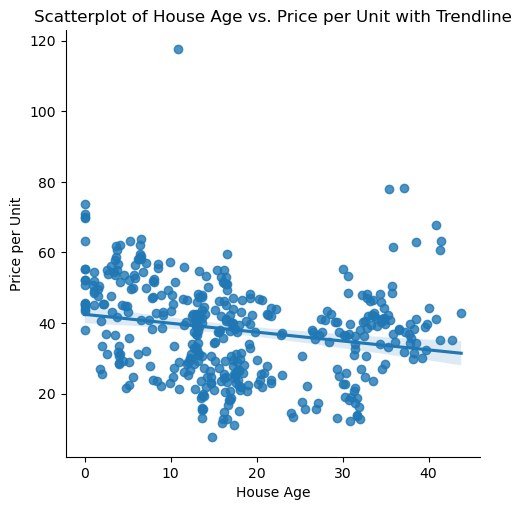

In [35]:
# Creating scatterplot with trendline
sns.lmplot(x='House age', y='Price per unit', data=re_org_data)
plt.title('Scatterplot of House Age vs. Price per Unit with Trendline')
plt.xlabel('House Age')
plt.ylabel('Price per Unit')

# Show the plot
plt.show()

In the last couple of visualizations, we can see the relationship between "House Age" and "Price per Unit." The trendline indicates the general direction and strength of this relationship: if it slopes upwards, it suggests a positive correlation, meaning as "House Age" increases, "Price per Unit" tends to increase. Conversely, a downward slope indicates a negative correlation. Outliers, points deviating from the trendline, may indicate anomalies. Overall patterns and data distribution can be observed, informing further analysis.

In [38]:
#Selecting variables for the pair plot
selected_vars = ['House age', 'D. metro', 'N. shops', 'Price per unit']

C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

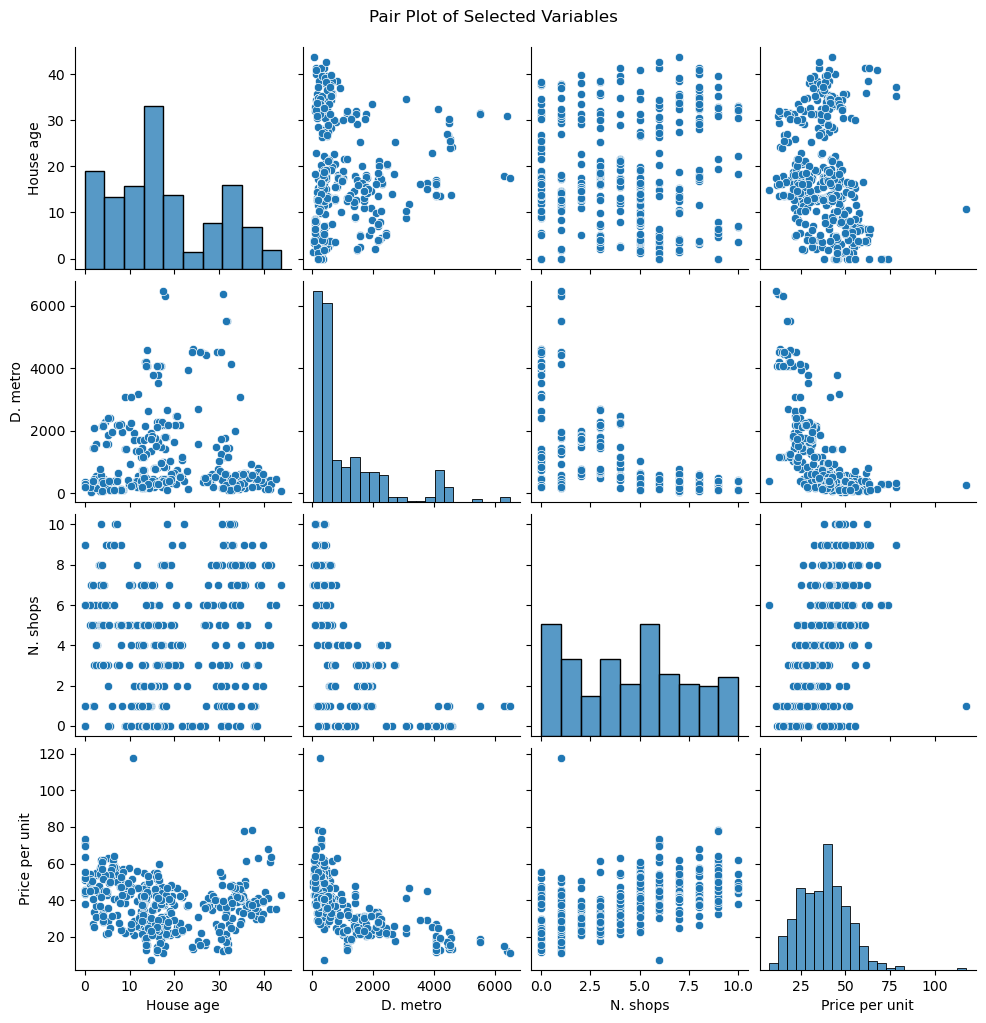

In [39]:
# Creating pair plot with selected variables
pairplot = sns.pairplot(re_org_data[selected_vars])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)

#Saving the figure
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pairplot_selected_variables.png'))

#Showing the plot
plt.show()

In [40]:
#Categorical Plots: Determining sensible categories for price ranges
price_bins = pd.qcut(re_org_data['Price per unit'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

In [41]:
#Createing a new categorical variable based on price categories
re_org_data['Price Category'] = price_bins

C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


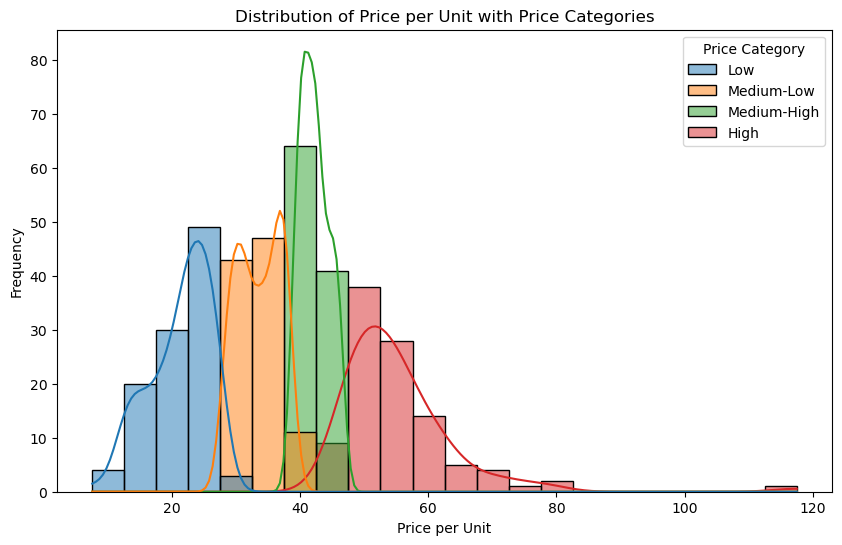

In [42]:
#Visualizing the distribution of the variables using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=re_org_data, x='Price per unit', hue='Price Category', kde=True)
plt.title('Distribution of Price per Unit with Price Categories')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')

# Saving the figure
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'price_per_unit_distribution.png'))

# Showing the plot
plt.show()

On the last visualization we cna see how it divides the "Price per unit" column into four categories based on quartiles, creating a new categorical variable. It then visualizes the distribution of prices using a histogram, with each category represented by a different color. The kde=True parameter adds a smoothed line representing the distribution.

The values taken for the price categories are determined by the quartiles of the "Price per unit" column. When using quartiles to divide the data into four categories, each category represents a quarter of the data, ensuring an approximately equal number of observations in each category.

For example, if the quartiles of the "Price per unit" column are $200,000, $300,000, and $400,000, the categories might be defined as follows:

- Low: Prices below $200,000
- Medium-Low: Prices between $200,000 and $300,000
- Medium-High: Prices between $300,000 and $400,000
- High: Prices above $400,000

These values are just examples taken as referebce, and the actual values will depend on the distribution of prices in your dataset. The pd.qcut() function automatically calculates the quartiles and assigns data points to categories accordingly.

In [44]:
#Seting the style for the next plot.
sns.set(style="ticks")

C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


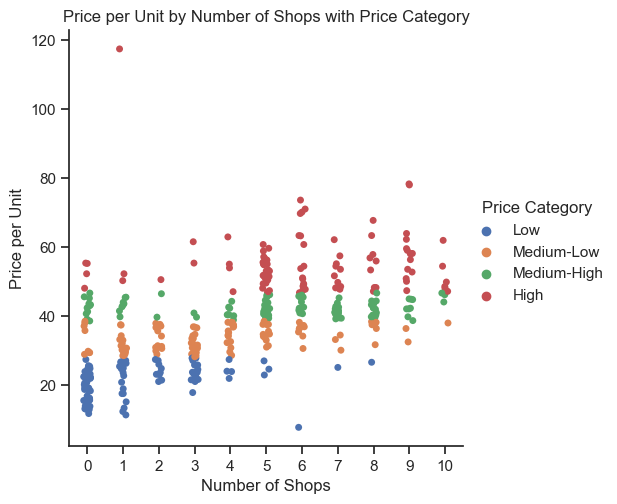

In [46]:
#Creating the categorical plot in seaborn using the price categories created above.
g = sns.catplot(x="N. shops", y="Price per unit", hue="Price Category", data=re_org_data)

#Setthing title and axis labels
plt.title('Price per Unit by Number of Shops with Price Category')
plt.xlabel('Number of Shops')
plt.ylabel('Price per Unit')

# Saving the figure
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'price_per_unit_by_num_shops_with_category.png'))

# Showing the plot
plt.show()

In [47]:
#Exporting re_clean_data
re_org_data.to_csv(os.path.join(path, 'Data', 'Prepared Data', 're_clean_data.csv'))